In [1]:
# -*- coding: utf-8 -*-
#
#----------------------------------------------------------
# script name: 
#----------------------------------------------------------
# creator: zhidong.lu
# create date: 2019-05-30
# update date: 2019-05-30
# version: 1.0
#----------------------------------------------------------
#
#       
#----------------------------------------------------------
import os
import re
import sys
import csv
import json
import time
import pytz
import datetime
from collections import OrderedDict
from itertools import product
import pickle

import gc
import multiprocessing

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import random

pd.pandas.set_option("display.max_columns", 100)
pd.pandas.set_option("display.max_rows", 300)

# pd.set_option('max_colwidth', 200)
# pd.set_option('display.max_rows', 40)
# pd.set_option('display.max_columns', None)



os.chdir(r"C:\Users\zhidong.lu\Desktop\PPD-First-Round-Data-Updated")

In [2]:
plt.style.use({"figure.figsize": [s0*3 for s0 in (4, 2)]})
sns.set(style="whitegrid", rc={"figure.figsize": [s0*3 for s0 in (4, 2)]})

In [3]:
from ModelingToolkit.LogisticModel import *
from ModelingToolkit.FeatureEngineering import *

In [4]:
#################################################################################
# train
with open("./Training Set/PPD_Training_Master_GBK_3_1_Training_Set.csv", encoding="gbk", mode="r") as fr:
    df_train_master = pd.read_csv(fr)
    _cols = df_train_master.columns.tolist()
    _cols_adj = ["Idx", "target", "ListingInfo"]
    _ = [_cols.remove(s0) for s0 in _cols_adj]
    _cols.sort()
    _cols = _cols_adj+_cols
    df_train_master = df_train_master[_cols]

with  open("./Training Set/PPD_LogInfo_3_1_Training_Set.csv", encoding="gbk", mode="r") as fr:
    df_train_log_info = pd.read_csv(fr)
    df_train_log_info[["LogInfo1", "LogInfo2"]] = df_train_log_info[["LogInfo1", "LogInfo2"]].applymap(str)

with  open("./Training Set/PPD_Userupdate_Info_3_1_Training_Set.csv", encoding="gbk", mode="r") as fr:
    df_train_userupdate_info = pd.read_csv(fr)

#################################################################################
_cols = [s0 for s0 in df_train_master.columns.tolist() if re.search("(SocialNetwork_|ThirdParty_Info_Period)", s0)!=None]
df_train_master[_cols] = df_train_master[_cols].applymap(lambda s0: (np.NaN if s0==-1 else np.float64(s0)))

# #################################################################################
# # test
# with open("./Test Set/PPD_Master_GBK_2_Test_Set_utf8.csv", encoding="utf-8", mode="r") as fr:
#     df_test_master = pd.read_csv(fr)
    
#     _cols = df_test_master.columns.tolist()
#     _ = [_cols.remove(s0) for s0 in ["Idx", "ListingInfo"]]
#     _cols.sort()
#     _cols = ["Idx", "ListingInfo"]+_cols
#     df_test_master = df_test_master[_cols]

# with  open("./Test Set/PPD_LogInfo_2_Test_Set.csv", encoding="gbk", mode="r") as fr:
#     df_test_log_info = pd.read_csv(fr)
#     df_test_log_info[["LogInfo1", "LogInfo2"]] = df_test_log_info[["LogInfo1", "LogInfo2"]].applymap(str)

# with  open("./Test Set/PPD_Userupdate_Info_2_Test_Set.csv", encoding="gbk", mode="r") as fr:
#     df_test_userupdate_info = pd.read_csv(fr)




In [5]:
########################################################################
df_describe_info_master = func_dataframe_describe(in_df=df_train_master)
df_freq_table_master = func_freqency_stat(in_df=df_train_master, drop_labels=["Idx"])

########################################################################
df_describe_info_log = func_dataframe_describe(in_df=df_train_log_info)
df_freq_table_log = func_freqency_stat(in_df=df_train_log_info)

########################################################################
df_describe_info_userupdate = func_dataframe_describe(in_df=df_train_userupdate_info)
df_freq_table_userupdate = func_freqency_stat(in_df=df_train_userupdate_info)

In [6]:
df_train_master["target_label"] = df_train_master["target"].apply(lambda s0: "{}_{}".format(s0, ("bad" if s0==1 else "good")))
df_train_master["ListingInfo_YM"] = df_train_master["ListingInfo"].apply(lambda s0: datetime.datetime.strftime(datetime.datetime.strptime(s0, "%Y/%m/%d"), "%Y-%m"))
df_train_master["ListingInfo"] = df_train_master["ListingInfo"].apply(lambda s0: datetime.datetime.strftime(datetime.datetime.strptime(s0, "%Y/%m/%d"), "%Y-%m-%d"))
df_train_master["UserInfo_9"] = df_train_master["UserInfo_9"].apply(lambda s0: s0.strip(" "))

In [7]:
df_train_master.sample(10)

,Idx,target,ListingInfo,Education_Info1,Education_Info2,Education_Info3,Education_Info4,Education_Info5,Education_Info6,Education_Info7,Education_Info8,SocialNetwork_1,SocialNetwork_10,SocialNetwork_11,SocialNetwork_12,SocialNetwork_13,SocialNetwork_14,SocialNetwork_15,SocialNetwork_16,SocialNetwork_17,SocialNetwork_2,SocialNetwork_3,SocialNetwork_4,SocialNetwork_5,SocialNetwork_6,SocialNetwork_7,SocialNetwork_8,SocialNetwork_9,ThirdParty_Info_Period1_1,ThirdParty_Info_Period1_10,ThirdParty_Info_Period1_11,ThirdParty_Info_Period1_12,ThirdParty_Info_Period1_13,ThirdParty_Info_Period1_14,ThirdParty_Info_Period1_15,ThirdParty_Info_Period1_16,ThirdParty_Info_Period1_17,ThirdParty_Info_Period1_2,ThirdParty_Info_Period1_3,ThirdParty_Info_Period1_4,ThirdParty_Info_Period1_5,ThirdParty_Info_Period1_6,ThirdParty_Info_Period1_7,ThirdParty_Info_Period1_8,ThirdParty_Info_Period1_9,ThirdParty_Info_Period2_1,ThirdParty_Info_Period2_10,ThirdParty_Info_Period2_11,ThirdParty_Info_Period2_12,ThirdParty_Info_Period2_13,ThirdParty_Info_Period2_14,ThirdParty_Info_Period2_15,ThirdParty_Info_Period2_16,ThirdParty_Info_Period2_17,ThirdParty_Info_Period2_2,ThirdParty_Info_Period2_3,ThirdParty_Info_Period2_4,ThirdParty_Info_Period2_5,ThirdParty_Info_Period2_6,ThirdParty_Info_Period2_7,ThirdParty_Info_Period2_8,ThirdParty_Info_Period2_9,ThirdParty_Info_Period3_1,ThirdParty_Info_Period3_10,ThirdParty_Info_Period3_11,ThirdParty_Info_Period3_12,ThirdParty_Info_Period3_13,ThirdParty_Info_Period3_14,ThirdParty_Info_Period3_15,ThirdParty_Info_Period3_16,ThirdParty_Info_Period3_17,ThirdParty_Info_Period3_2,ThirdParty_Info_Period3_3,ThirdParty_Info_Period3_4,ThirdParty_Info_Period3_5,ThirdParty_Info_Period3_6,ThirdParty_Info_Period3_7,ThirdParty_Info_Period3_8,ThirdParty_Info_Period3_9,ThirdParty_Info_Period4_1,ThirdParty_Info_Period4_10,ThirdParty_Info_Period4_11,ThirdParty_Info_Period4_12,ThirdParty_Info_Period4_13,ThirdParty_Info_Period4_14,ThirdParty_Info_Period4_15,ThirdParty_Info_Period4_16,ThirdParty_Info_Period4_17,ThirdParty_Info_Period4_2,ThirdParty_Info_Period4_3,ThirdParty_Info_Period4_4,ThirdParty_Info_Period4_5,ThirdParty_Info_Period4_6,ThirdParty_Info_Period4_7,ThirdParty_Info_Period4_8,ThirdParty_Info_Period4_9,ThirdParty_Info_Period5_1,ThirdParty_Info_Period5_10,ThirdParty_Info_Period5_11,ThirdParty_Info_Period5_12,ThirdParty_Info_Period5_13,ThirdParty_Info_Period5_14,ThirdParty_Info_Period5_15,ThirdParty_Info_Period5_16,ThirdParty_Info_Period5_17,ThirdParty_Info_Period5_2,ThirdParty_Info_Period5_3,ThirdParty_Info_Period5_4,ThirdParty_Info_Period5_5,ThirdParty_Info_Period5_6,ThirdParty_Info_Period5_7,ThirdParty_Info_Period5_8,ThirdParty_Info_Period5_9,ThirdParty_Info_Period6_1,ThirdParty_Info_Period6_10,ThirdParty_Info_Period6_11,ThirdParty_Info_Period6_12,ThirdParty_Info_Period6_13,ThirdParty_Info_Period6_14,ThirdParty_Info_Period6_15,ThirdParty_Info_Period6_16,ThirdParty_Info_Period6_17,ThirdParty_Info_Period6_2,ThirdParty_Info_Period6_3,ThirdParty_Info_Period6_4,ThirdParty_Info_Period6_5,ThirdParty_Info_Period6_6,ThirdParty_Info_Period6_7,ThirdParty_Info_Period6_8,ThirdParty_Info_Period6_9,ThirdParty_Info_Period7_1,ThirdParty_Info_Period7_10,ThirdParty_Info_Period7_11,ThirdParty_Info_Period7_12,ThirdParty_Info_Period7_13,ThirdParty_Info_Period7_14,ThirdParty_Info_Period7_15,ThirdParty_Info_Period7_16,ThirdParty_Info_Period7_17,ThirdParty_Info_Period7_2,ThirdParty_Info_Period7_3,ThirdParty_Info_Period7_4,ThirdParty_Info_Period7_5,ThirdParty_Info_Period7_6,ThirdParty_Info_Period7_7,ThirdParty_Info_Period7_8,ThirdParty_Info_Period7_9,UserInfo_1,UserInfo_10,UserInfo_11,UserInfo_12,UserInfo_13,UserInfo_14,UserInfo_15,UserInfo_16,UserInfo_17,UserInfo_18,UserInfo_19,UserInfo_2,UserInfo_20,UserInfo_21,UserInfo_22,UserInfo_23,UserInfo_24,UserInfo_3,UserInfo_4,UserInfo_5,UserInfo_6,UserInfo_7,UserInfo_8,UserInfo_9,WeblogInfo_1,WeblogInfo_10,WeblogInfo_11,WeblogInfo_12,WeblogInfo_13,WeblogInfo_14,WeblogInfo_15,WeblogInfo_16,WeblogInfo_17,WeblogInfo_18,

In [278]:
# 数据集切分
oot_cut_YM = "2014-08"
df_train_master["_sample_type"] = df_train_master["ListingInfo_YM"].apply(lambda s0: ("dev" if s0<oot_cut_YM else "oot"))
df_train_master_dev = df_train_master.query("_sample_type=='dev'").reset_index(drop=True)
df_train_master_oot = df_train_master.query("_sample_type=='oot'").reset_index(drop=True)

###########################################################################
# 计算变量自动分箱后WOE、IV（fine binning）
def _func_calc_fine_iv(date_type, in_df, var_name, target_label):
    rt = OrderedDict({
        "crosstab_converted": None,
        "fine_IV": None,
        "boundary": None,
        "mapping_gb_class": None,
        "reverse_label_idx_WOE": None,
    })
    if date_type=="Numerical":
        _, rt["crosstab_converted"], rt["boundary"] = func_auto_binning_continuous_v2(
            in_df=in_df, var_name=var_name, target_label=target_label,
            min_pct=0.05, max_bins_cnt=10, fillna_value=-9999,
            method="01_decision_tree",
            # method="02_best_ks",
        )
    elif date_type=="Categorical":
        _, rt["crosstab_converted"], rt["mapping_gb_class"] = func_auto_combining_discrete_v2(
            in_df=in_df, var_name=var_name, target_label=target_label,
            min_pct=0.05, max_bins_cnt=5,
            # method="01_equal_width",
            method="02_best_ks",
        )
    _crosstab_converted = rt["crosstab_converted"]
    rt["fine_IV"] = _crosstab_converted.loc["total", "IV"]
    _d = _crosstab_converted["WOE"].reset_index(drop=True).dropna().reset_index().values
    _X = _d[:, 0]
    _y = _d[:, 1]
    rt["reverse_label_idx_WOE"] = (_X.shape[0]*sum(_X*_y)-sum(_X)*sum(_y))/(_X.shape[0]*sum(_X**2)-sum(_X)**2+1e-8)>=0
    return rt

_exclude_col = ["Idx", "target", "ListingInfo", "_sample_type"]
feature_list = df_describe_info_master.reset_index()[["column_name", "data_type"]]
feature_list = feature_list[-feature_list["column_name"].isin(_exclude_col)].reset_index(drop=True)

_fine_binning_result = []
for _column_name, _data_type in feature_list.values:
    _fine_binning_result.append(
        _func_calc_fine_iv(
            date_type=_data_type,
            in_df=df_train_master_dev,
            var_name=_column_name, target_label="target_label")
    )
    # print("done: {}".format(_column_name))
feature_list["fine_IV"] = [s0["fine_IV"] for s0 in _fine_binning_result]
feature_list["boundary"] = [s0["boundary"] for s0 in _fine_binning_result]
feature_list["mapping_gb_class"] = [s0["mapping_gb_class"] for s0 in _fine_binning_result]
feature_list["crosstab_converted"] = [s0["crosstab_converted"] for s0 in _fine_binning_result]
feature_list["reverse_label_idx_WOE"] = [s0["reverse_label_idx_WOE"] for s0 in _fine_binning_result]

feature_list = feature_list.sort_values(by=["fine_IV"], ascending=False).reset_index(drop=True)


###########################################################################
_exclude_col = [
    "UserInfo_24",
]
_reverse_label_idx_col = [
    'ThirdParty_Info_Period4_15',
    'ThirdParty_Info_Period2_8',
    'ThirdParty_Info_Period1_15',
    'ThirdParty_Info_Period5_2',
    'UserInfo_15',
    'ThirdParty_Info_Period5_3',
    'UserInfo_7',
    'WeblogInfo_4',
    'ThirdParty_Info_Period3_2',
    'ThirdParty_Info_Period1_3',
    'ThirdParty_Info_Period2_1',
    'WeblogInfo_15',
    'UserInfo_18',
    'WeblogInfo_2',
    'UserInfo_1',
    'UserInfo_3',
    'WeblogInfo_14',
]
feature_list_flt = feature_list[-feature_list["column_name"].isin(_exclude_col)] \
    .query("fine_IV>={}".format(0.005)) \
    .sort_values(by=["fine_IV"], ascending=False).reset_index(drop=True)
feature_list_flt["reverse_label_idx_WOE_adj"] = feature_list_flt.apply(
    lambda s0: (s0["reverse_label_idx_WOE"]
                if (s0["column_name"] not in _reverse_label_idx_col)
                else not s0["reverse_label_idx_WOE"]), axis=1)

In [279]:
df_train_master_cvt = df_train_master[["Idx", "target", "target_label", "ListingInfo", "ListingInfo_YM", "_sample_type"]].reset_index(drop=True)
for _var, _data in list(df_train_master[feature_list_flt["column_name"].tolist()].to_dict(orient="Series").items())[:]:
    _cvt_mapping = dict(zip(feature_list_flt.columns.tolist(), feature_list_flt.query("column_name=='{}'".format(_var)).values[0]))
    if _cvt_mapping["data_type"]=="Numerical":
        _data_converted = func_binning_continuous_v1(
            in_data=_data, bins=_cvt_mapping.get("boundary"),
            fillna_value=-9999, right_border=True, include_lowest=False,
            reverse_label=False,
        )
    elif _cvt_mapping["data_type"]=="Categorical":
        _cvt = _cvt_mapping.get("mapping_gb_class")
        _data_converted = func_combining_discrete_v1(
            in_data=_data.fillna("NaN"), mapping_gb_class=_cvt,
            fillna_value="NaN", cvt_fillna_value=1,
            reverse_label=False,
        )
    df_train_master_cvt["cvt_{}".format(_var)] = _data_converted

In [413]:
from sklearn.model_selection import train_test_split

df_train_master_cvt_dev = df_train_master_cvt.query("_sample_type=='dev'").reset_index(drop=True)
df_train_master_cvt_oot = df_train_master_cvt.query("_sample_type=='oot'").reset_index(drop=True)

# feature_names = [s0 for s0 in df_train_master_application.columns.tolist() if re.search("^cvt_", s0)!=None]
feature_names = ["cvt_{}".format(s0) for s0 in feature_list_flt.query("fine_IV>{}".format(0.01))["column_name"].tolist()]

_df_labels = pd.get_dummies(data=df_train_master_cvt_dev[["target_label"]])
_df_labels_oot = pd.get_dummies(data=df_train_master_cvt_oot[["target_label"]])



_tmp_feature_list_flt = feature_list_flt[["column_name", "crosstab_converted", "reverse_label_idx_WOE_adj"]].reset_index(drop=True)
_tmp_feature_list_flt["column_name"] = _tmp_feature_list_flt["column_name"].apply(lambda s0: "cvt_{}".format(s0))
_tmp_feature_list_flt["crosstab_converted"] = _tmp_feature_list_flt.apply(
    lambda s0: (s0["reverse_label_idx_WOE_adj"], s0["crosstab_converted"].reset_index().query("index!='total'")[["index", "WOE"]]), axis=1
).apply(lambda t: (dict(zip(t[1]["index"], t[1]["WOE"].sort_index(ascending=False))) if t[0] else dict(t[1].values)))
mapping_woe_cvt = dict(_tmp_feature_list_flt[["column_name", "crosstab_converted"]].values)

_df_features = pd.DataFrame(
    dict([(_k, _v.apply(lambda s0: mapping_woe_cvt.get(_k).get(s0)))
          for _k, _v in df_train_master_cvt_dev[feature_names].to_dict(orient="series").items()])
)
_df_features_oot = pd.DataFrame(
    dict([(_k, _v.apply(lambda s0: mapping_woe_cvt.get(_k).get(s0)))
          for _k, _v in df_train_master_cvt_oot[feature_names].to_dict(orient="series").items()])
)


#############################################################################################
# 开发样本变量PSI计算
_df_dev_features_psi_summary = func_calc_psi_discrete_features_monthly(
    in_data_features = df_train_master_cvt_dev[_df_features.columns.tolist()],
    in_data_YM = df_train_master_cvt_dev["ListingInfo_YM"],
    base_last_months=4,
#     verbose=1,
    verbose=0,
)
_df_dev_features_psi_summary_avg = _df_dev_features_psi_summary[
    pd.Series(_df_dev_features_psi_summary.columns).sort_values().tolist()[3:]
].mean(axis=1)
_feature_names_psi_flt = _df_dev_features_psi_summary_avg[_df_dev_features_psi_summary_avg<=0.3].index.tolist()
_df_features = _df_features[_feature_names_psi_flt]
_df_features_oot = _df_features_oot[_feature_names_psi_flt]

In [412]:
#############################################################################################
# colinearity
_df_features_0 = df_train_master_cvt_dev[feature_names][_feature_names_psi_flt].applymap(lambda s0: int("{}_".format(s0).split("_")[0]))
# _df_features_oot_0 = df_train_master_cvt_oot[feature_names].applymap(lambda s0: int("{}_".format(s0).split("_")[0]))
feature_names_non_collin, corr_table = func_colinearity_rt_col(
    in_df_features=_df_features_0, corr_threshold=0.5, corr_method="kendall")
_df_features = _df_features[feature_names_non_collin]
_df_features_oot = _df_features_oot[feature_names_non_collin]

#############################################################################################
# multicolinearity
# VIF
vif_table = func_multicolinearity_vif(in_df_features=_df_features, with_constant=True)
# vif_threshold = 5
vif_threshold = 20
feature_names_vif_retain = vif_table.query("feature_name!='constant' and VIF<{}".format(vif_threshold))["feature_name"].tolist()
_df_features = _df_features[feature_names_vif_retain]
_df_features_oot = _df_features_oot[feature_names_vif_retain]


# _exclude_col = [
#     "ThirdParty_Info_Period6_6", "WeblogInfo_20", "ThirdParty_Info_Period6_16", "ThirdParty_Info_Period6_1",
#     "UserInfo_15", "WeblogInfo_4", "ThirdParty_Info_Period6_6", "WeblogInfo_20",
#     "ThirdParty_Info_Period6_16", "ThirdParty_Info_Period6_1", "ThirdParty_Info_Period5_2",
# ]
_df_features = _df_features[[s0 for s0 in _df_features.columns.tolist() if (s0 not in _exclude_col)]]
_df_features_oot = _df_features_oot[[s0 for s0 in _df_features_oot.columns.tolist() if (s0 not in _exclude_col)]]


###########################################################################
X_train_0, X_test, y_train_0, y_test = train_test_split(
    _df_features, _df_labels,
    random_state=2345, train_size=0.7, test_size=0.3
)

X_train = pd.concat([
        X_train_0[y_train_0.iloc[:, 1]==0],
        pd.concat([X_train_0[y_train_0.iloc[:, 1]==1]]*10),
    ]).reset_index(drop=True)
y_train = pd.concat([
        y_train_0[y_train_0.iloc[:, 1]==0],
        pd.concat([y_train_0[y_train_0.iloc[:, 1]==1]]*10),
    ]).reset_index(drop=True)

_idx = X_train.index.tolist()
np.random.shuffle(_idx)
X_train = X_train.iloc[_idx, :].reset_index(drop=True)
y_train = y_train.iloc[_idx, :].reset_index(drop=True)

X_train_minmax_scale = ((X_train-X_train.min(axis=0))/(X_train.max(axis=0)-X_train.min(axis=0)))
X_test_minmax_scale = ((X_test-X_test.min(axis=0))/(X_test.max(axis=0)-X_test.min(axis=0)))

In [377]:
# tmp = X_train.reset_index(drop=True)
# tmp["target"] = y_train.iloc[:, 1]
# tmp.to_excel("./application.xlsx", index=False)

In [378]:
# import tensorflow as tf

# # batch_size = 100
# # max_epochs = 200
# l_regularizer = 0.1
# dropout_rate = 0.1

# opt = tf.keras.optimizers.RMSprop(lr=0.1, decay=0.999)
# model = tf.keras.models.Sequential()
# model.add(
#     tf.keras.layers.Dense(
#         units=2000, input_dim=X_train.shape[1], activation="sigmoid",
#         kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l_regularizer, l2=l_regularizer),
# #         bias_regularizer=tf.keras.regularizers.l1_l2(l1=l_regularizer, l2=l_regularizer),
# #         activity_regularizer=tf.keras.regularizers.l1_l2(l1=l_regularizer, l2=l_regularizer),
#     )
# )
# # model.add(tf.keras.layers.Dropout(rate=dropout_rate))

# # model.add(
# #     tf.keras.layers.Dense(
# #         units=20, activation="sigmoid",
# #         kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l_regularizer, l2=l_regularizer),
# # #         bias_regularizer=tf.keras.regularizers.l1_l2(l1=l_regularizer, l2=l_regularizer),
# # #         activity_regularizer=tf.keras.regularizers.l1_l2(l1=l_regularizer, l2=l_regularizer),
# #     )
# # )
# # # model.add(tf.keras.layers.Dropout(rate=dropout_rate))

# model.add(
#     tf.keras.layers.Dense(
#         units=2, activation="softmax",
#         kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0, l2=l_regularizer),
#         bias_regularizer=tf.keras.regularizers.l1_l2(l1=0, l2=l_regularizer),
# #         activity_regularizer=tf.keras.regularizers.l1_l2(l1=l_regularizer, l2=l_regularizer),
#     )
# )

# model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["mae", "mse"])
# h = model.fit(
#     x=X_train.values, y=y_train.values,
# #     batch_size=batch_size, epochs=max_epochs, shuffle=True,
#     batch_size=100, epochs=100, shuffle=True,
# #     verbose=1,
#     verbose=0,
#     validation_data=(X_test.values, y_test.values),
# )

In [379]:
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression(
#     penalty="l2", tol=1e-8, C=0.7, fit_intercept=True, max_iter=100,
#     solver="newton-cg",
#     random_state=1234, n_jobs=4, verbose=1)
# h = model.fit(X=X_train.values, y=y_train.values[:, 1])

In [414]:
# ############################################################################
# logistic_model_res, model_cols, df_result_selection_step = \
#     func_logistic_model_stepwise(df_X=X_train,
#                                  y=y_train.iloc[:, 1],
#                                  initial_cols=None, include_cols=None, exclude_cols=None,
#                                  sle=0.05, sls=0.01, with_intercept=True, verbose=1)

# ############################################################################
# logistic_model_res, model_cols, df_result_selection_step = \
#     func_logistic_model_forward(df_X=X_train, y=y_train.iloc[:, 1],
#                                 initial_cols=None, exclude_cols=None,
#                                 sle=0.05, with_intercept=True, verbose=1)

############################################################################
logistic_model_res, model_cols, df_result_selection_step = \
    func_logistic_model_backward(df_X=X_train,
                                 y=y_train.iloc[:, 1],
                                 initial_cols=None, include_cols=None,
                                 sls=0.01, with_intercept=True, verbose=1)

current step 1:
    variable(s): [ cvt_ThirdParty_Info_Period5_12 ] removed.

current step 2:
    variable(s): [ cvt_ThirdParty_Info_Period2_6 ] removed.

current step 3:
    variable(s): [ cvt_ThirdParty_Info_Period1_2 ] removed.

selection step done.


In [415]:
len(model_cols)

34

In [381]:
_feature_list_flt_model = feature_list_flt[
    feature_list_flt["column_name"].apply(lambda s0: "cvt_{}".format(s0)).isin(model_cols)
].reset_index(drop=True)[["column_name", "data_type", "reverse_label_idx_WOE_adj"]]

Odds = 1/20
SCORE = 800
PD0 = 50

B = PD0/np.log(2)
A = SCORE+B*np.log(Odds)


In [382]:
score_card = []
for _column_name, _data_type, _reverse_label_idx_WOE_adj in _feature_list_flt_model.values[:0]:
    pass

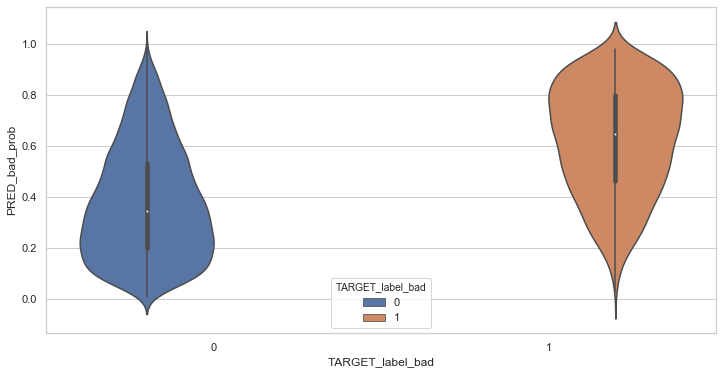

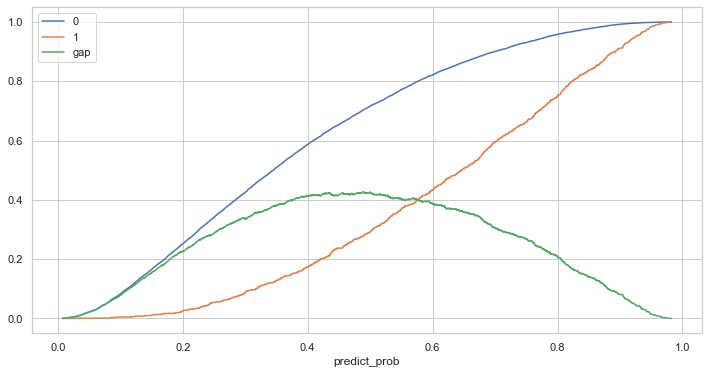

                     0         1       gap
predict_prob                              
0.488646      0.702516  0.276091  0.426425


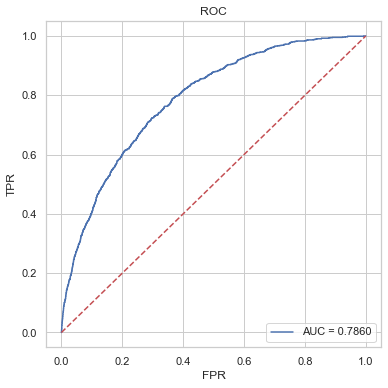

auc: 0.7859854644505088
gini: 0.5719709289010175


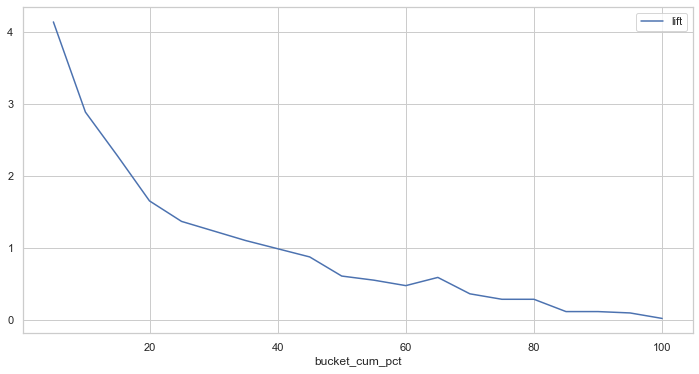

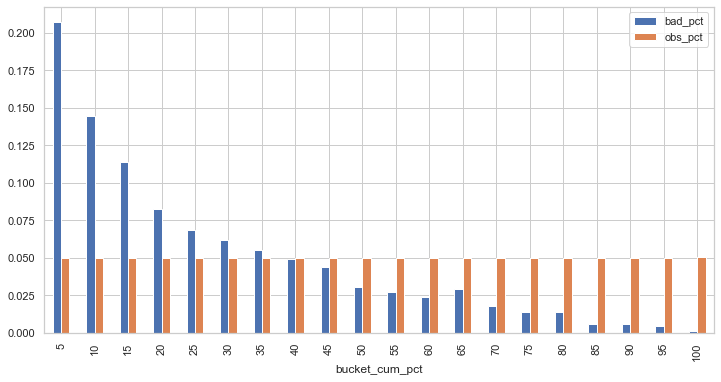

In [417]:
X, y = X_train_0.values, y_train_0.values
# X, y = X_test.values, y_test.values
# X, y = _df_features_oot.values, _df_labels_oot.values
# y_pred = model.predict(x=X)
# y_pred = model.predict_proba(X=X)

X = pd.DataFrame(X, columns=X_train.columns)[model_cols].values
X = np.concatenate([np.array([[1]]*X.shape[0]), X], axis=1)
y_pred = logistic_model_res.predict(exog=X)
y_pred = np.concatenate([(1-y_pred).reshape([-1, 1]), y_pred.reshape([-1, 1])], axis=1)

############################################################
ks, crossdens = func_calc_ks_cross(y_labels=y[:, -1], y_pred=y_pred[:, -1], plot=True)
print(ks)

auc = func_calc_auc_roc(y_labels=y[:, -1], y_pred=y_pred[:, -1], plot=True)
print("auc: {}".format(auc))
print("gini: {}".format(2*auc-1))

lift_table = func_calc_lift(
    y_labels=pd.Series(y[:, 1]).apply(lambda s0: ("good" if s0==0 else "bad")),
    y_pred=y_pred[:, -1],
    bucket_cnt=20, bad_label="bad", plot=True
)
# print(lift_table)

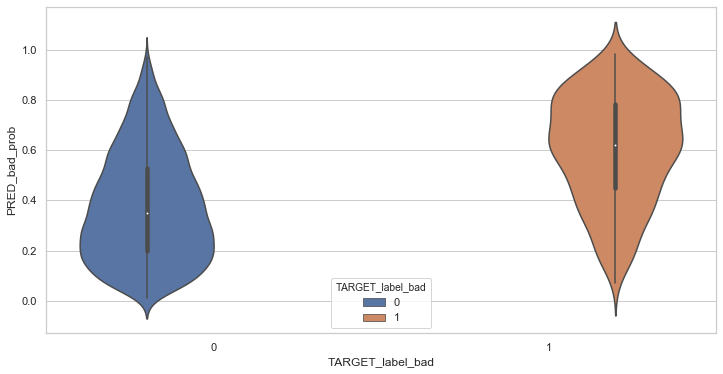

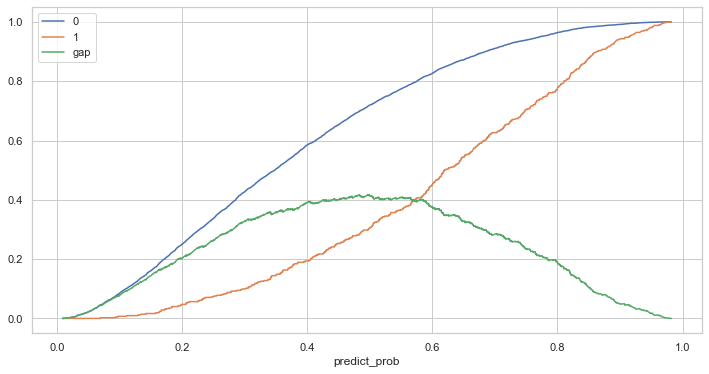

                     0         1       gap
predict_prob                              
0.49703       0.716009  0.297872  0.418136


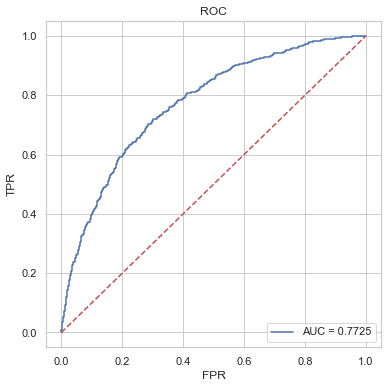

auc: 0.772493364024719
gini: 0.544986728049438


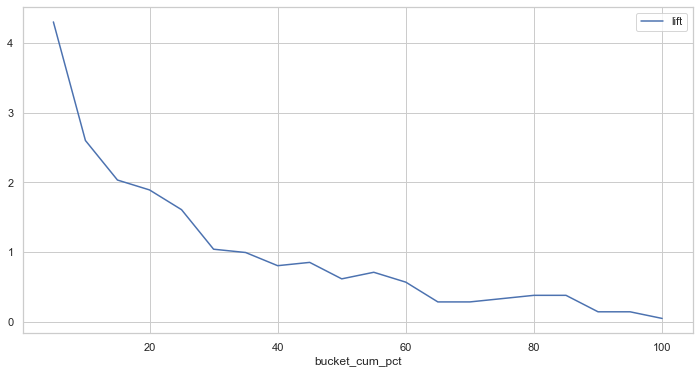

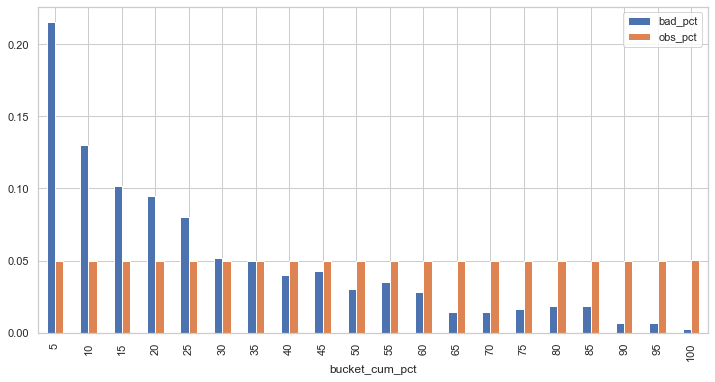

In [418]:
# X, y = X_train_0.values, y_train_0.values
X, y = X_test.values, y_test.values
# X, y = _df_features_oot.values, _df_labels_oot.values
# y_pred = model.predict(x=X)
# y_pred = model.predict_proba(X=X)

X = pd.DataFrame(X, columns=X_train.columns)[model_cols].values
X = np.concatenate([np.array([[1]]*X.shape[0]), X], axis=1)
y_pred = logistic_model_res.predict(exog=X)
y_pred = np.concatenate([(1-y_pred).reshape([-1, 1]), y_pred.reshape([-1, 1])], axis=1)

############################################################
ks, crossdens = func_calc_ks_cross(y_labels=y[:, -1], y_pred=y_pred[:, -1], plot=True)
print(ks)

auc = func_calc_auc_roc(y_labels=y[:, -1], y_pred=y_pred[:, -1], plot=True)
print("auc: {}".format(auc))
print("gini: {}".format(2*auc-1))

lift_table = func_calc_lift(
    y_labels=pd.Series(y[:, 1]).apply(lambda s0: ("good" if s0==0 else "bad")),
    y_pred=y_pred[:, -1],
    bucket_cnt=20, bad_label="bad", plot=True
)
# print(lift_table)

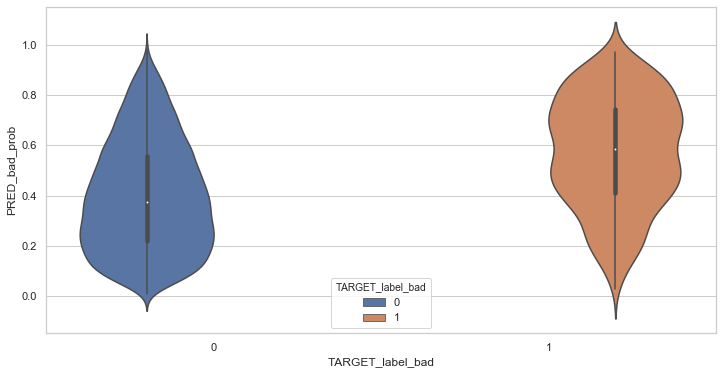

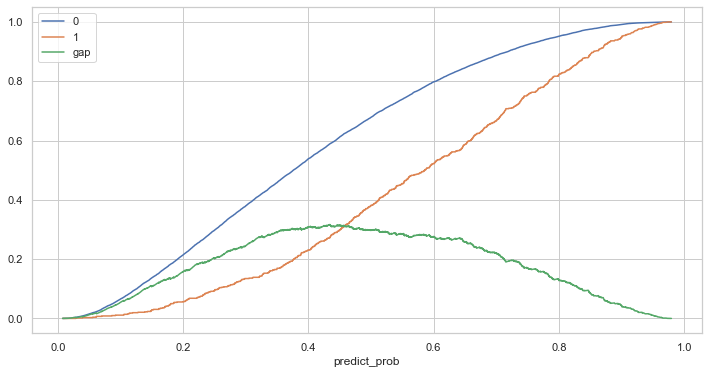

                     0         1      gap
predict_prob                             
0.434247      0.588635  0.271845  0.31679


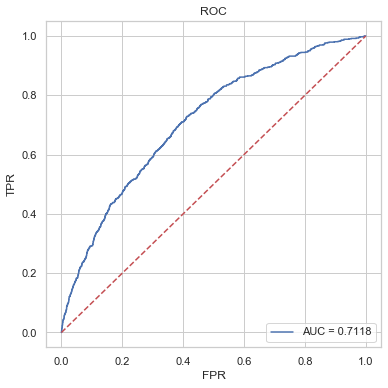

auc: 0.711797720214514
gini: 0.4235954404290281


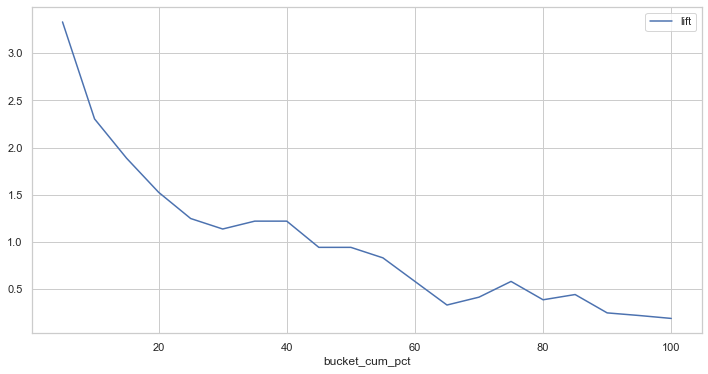

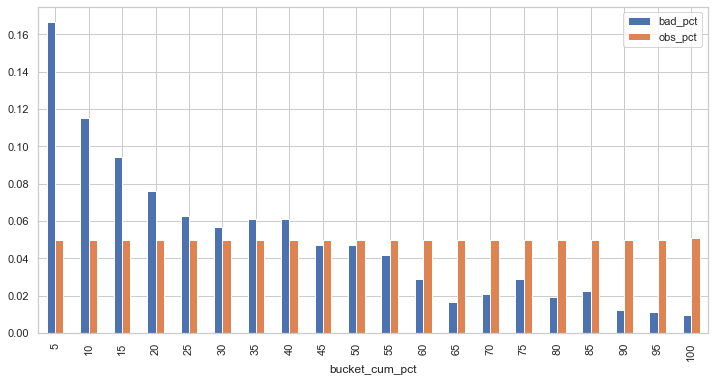

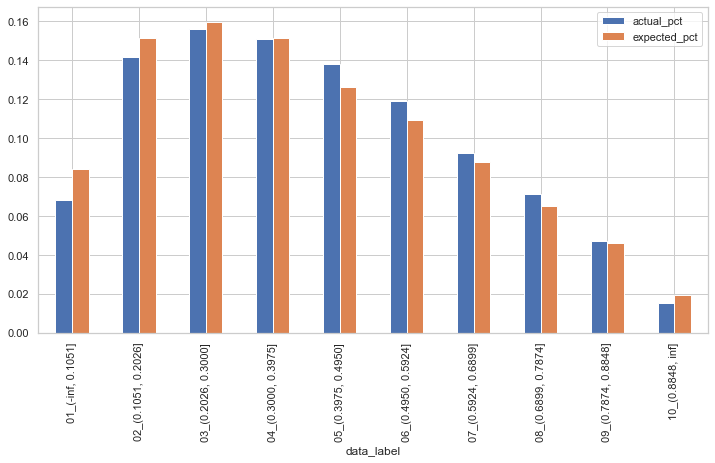

0.007557748972328827


In [419]:
# X, y = X_train_0.values, y_train_0.values
# X, y = X_test.values, y_test.values
X, y = _df_features_oot.values, _df_labels_oot.values
# y_pred = model.predict(x=X)
# y_pred = model.predict_proba(X=X)

X = pd.DataFrame(X, columns=X_train.columns)[model_cols].values
X = np.concatenate([np.array([[1]]*X.shape[0]), X], axis=1)
y_pred = logistic_model_res.predict(exog=X)
y_pred = np.concatenate([(1-y_pred).reshape([-1, 1]), y_pred.reshape([-1, 1])], axis=1)

############################################################
ks, crossdens = func_calc_ks_cross(y_labels=y[:, -1], y_pred=y_pred[:, -1], plot=True)
print(ks)

auc = func_calc_auc_roc(y_labels=y[:, -1], y_pred=y_pred[:, -1], plot=True)
print("auc: {}".format(auc))
print("gini: {}".format(2*auc-1))

lift_table = func_calc_lift(
    y_labels=pd.Series(y[:, 1]).apply(lambda s0: ("good" if s0==0 else "bad")),
    y_pred=y_pred[:, -1],
    bucket_cnt=20, bad_label="bad", plot=True
)
# print(lift_table)


X, y = _df_features.values, _df_labels.values[:, 1]
X = pd.DataFrame(X, columns=X_train.columns)[model_cols].values
X = np.concatenate([np.array([[1]]*X.shape[0]), X], axis=1)
y_pred_training_dev = logistic_model_res.predict(exog=X)

X, y = _df_features_oot.values, _df_labels_oot.values[:, 1]
X = pd.DataFrame(X, columns=X_train.columns)[model_cols].values
X = np.concatenate([np.array([[1]]*X.shape[0]), X], axis=1)
y_pred_oot = logistic_model_res.predict(exog=X)

psi, psi_table = func_calc_psi_continuous_v1(in_data_actual=y_pred_oot, in_data_expected=y_pred_training_dev, plot=True)
print(psi)
# psi_table

In [386]:
# df_features_psi_summary = func_calc_psi_discrete_features_monthly(
#     in_data_features = df_train_master_cvt[model_cols],
#     in_data_YM = df_train_master_cvt["ListingInfo_YM"],
#     base_last_months=4,
#     verbose=1,
# #     verbose=0,
# )
# df_features_psi_summary.to_clipboard()
# df_features_psi_summary

In [ ]:
# crosstab_converted = func_woe_report_v1(
#     in_var=func_binning_continuous_v2(
#         in_df=df_train_master, var_name="SocialNetwork_6",
#         bins=[-np.inf, 0, 1, np.inf], fillna_value=-9999, right_border=True, reverse_label=True,
#     ), in_target=df_train_master["target_label"], with_total=True,
# )
# crosstab_converted

In [44]:
# data_converted, crosstab_converted, mapping_gb_class = func_auto_combining_discrete_v1(
#     in_var=df_train_master["UserInfo_20"], in_target=df_train_master["target_label"],
#     min_pct=0.05, max_bins_cnt=5, method="01_equal_width",
# )
# crosstab_converted

In [45]:
# data_converted, crosstab_converted, mapping_gb_class = func_auto_combining_discrete_v1(
#     in_var=df_train_master["UserInfo_20"], in_target=df_train_master["target_label"],
#     min_pct=0.05, max_bins_cnt=5, method="02_best_ks",
# )
# crosstab_converted

In [46]:
# data_converted, crosstab_converted, boundary = func_auto_binning_continuous_v2(
#     in_df=df_train_master, var_name="SocialNetwork_5", target_label="target_label",
#     min_pct=0.05, max_bins_cnt=10, fillna_value=-9999, method="01_decision_tree",
# )
# crosstab_converted

In [47]:
# data_converted, crosstab_converted, boundary = func_auto_binning_continuous_v2(
#     in_df=df_train_master, var_name="SocialNetwork_5", target_label="target_label",
#     min_pct=0.05, max_bins_cnt=10, fillna_value=-9999, method="02_best_ks",
# )
# crosstab_converted